# 18.06 Problem Set 6

## Problem 1 (5+5+5+5+5 points)

In this problem, you will use least-square fitting to examine the original 1662 data demonstrating [Boyle's law](https://en.wikipedia.org/wiki/Boyle%27s_law): the volume $v$ of a gas is inversely proportional to the pressure $p$ (for constant mass and temperature).

In that experiment, [described here (UVa)](https://galileo.phys.virginia.edu/classes/152.mf1i.spring02/Boyle.htm), [Robert Boyle](https://en.wikipedia.org/wiki/Robert_Boyle) measured the volume of air trapped in the sealed end of a glass tube as they poured mercury in the other end.  The total pressure $p$ on the trapped air is proportional to the height of the mercury, plus the height of mercury balancing atmospheric pressure (as measured by a [Torricelli barometer](https://en.wikipedia.org/wiki/Torricelli%27s_experiment)).  They found that the volume of the gas varied inversely with $v$.  The experiment is depicted here:

![Boyle's law experiment](https://galileo.phys.virginia.edu/classes/152.mf1i.spring02/Boyle_files/image002.png)

**(a)** Open [Boyle's 1662 manuscript](https://bvpb.mcu.es/en/catalogo_imagenes/grupo.do?path=11143411), find the chapter on the "new experiment", and locate the experimental data, which is labelled *A Table of the Condensation of Air*.    Extract the data from the first column "A" and enter it into a Julia array `v` below — this is the height of the air column, proportional to its volume.  (There is a second column "A" that contains the same data divided by 4.)  Extract the data from the column "D" and enter it into a Julia array `p` below — this is the height of the mercury column (including the amount corresponding to atmospheric pressure), and is proportional to the total pressure.

**(b)** Perform a least square fit to the model $v = \alpha / p$, i.e. **find $\alpha$** that minimizes the sum of the squared error $\sum_k (v_k - \alpha/p_k)^2$ for Boyle's data points $(p_k, v_k)$.  (Note: in Julia, you can make a vector of the inverse pressures with `1 ./ p`.)   **Plot the data and the fit** ($v$ vs. $p$) using the provided code below. 

**Note:** if you find yourself using calculus here or in subsequent parts, you are [re-inventing the wheel](https://en.wikipedia.org/wiki/Reinventing_the_wheel) — we already derived how to minimize the squared error in class, so please re-write it as a matrix least-squares problem and use the 18.06 results.

**(c)** Perform a least-square fit to a more complicated model, $v = \frac{\alpha}{p} + v_0$, for fit parameters $\alpha$ and $v_0$.   (That is, suppose that Boyle was slightly wrong, and that there is a minimum volume $v_0$ even for $p \to \infty$, similar to [van der Waals equation](https://en.wikipedia.org/wiki/Van_der_Waals_equation).)  What $\alpha$ and $v_0$ do you obtain?

**(d)** If the gas in Boyle's experiment exactly obeyed Boyle's law, i.e. if the theoretically correct $v_0$ is 0 in part (c), would you expect to get $v_0 = 0$ from a least-square fit of experimental data?  Why or why not?  (No detailed math please, just a sentence or two of explanation.)

**(e)** Alternatively, suppose we don't know the power law in our model: suppose $v = \alpha p^n$ for an unknown power $n$ and an unknown coefficient $\alpha$.  This depends *nonlinearly* on $n$, so at first glance it may seem that we cannot do a linear least-square fit using 18.06 techniques.   However, show that $\log v$ depends *linearly* on two unknown fit parameters in this model, and hence do a least-square fit of $\log v_k$ to the log of the model to estimate the parameters $\alpha$ and $n$ from Boyle's data.

### Solution

**(a)** First, we transcribe the data from Boyle's manuscript:

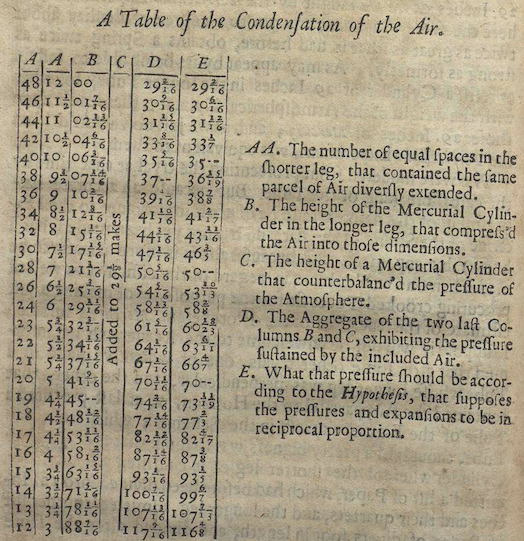

In [1]:
# part (a):

v = [48,46,44,42,40,38,36,34,32,30,28,26,24,23,22,21,20,19,18,17,16,15,14,13,12] # data from Boyle table, column A
p = [29+2/16,30+9/16,31+15/16,33+8/16,35+5/16,37,39+4/16,41+10/16,44+3/16,47+1/16,50+5/16,54+5/16,58+13/16,61+5/16,64+1/16,67+1/16,70+11/16,74+2/16,77+14/16,82+12/16,87+14/16,93+1/16,100+7/16,107+13/16,117+9/16] # data from Boyle table, column D

25-element Vector{Float64}:
  29.125
  30.5625
  31.9375
  33.5
  35.3125
  37.0
  39.25
  41.625
  44.1875
  47.0625
  50.3125
  54.3125
  58.8125
  61.3125
  64.0625
  67.0625
  70.6875
  74.125
  77.875
  82.75
  87.875
  93.0625
 100.4375
 107.8125
 117.5625

**(b)** Note that the model $v = \alpha/p$ can be written as
$$ \begin{pmatrix} 1/p_1 \\ 1/p_2 \\ \vdots \\ 1/p_k\end{pmatrix} \alpha = \begin{pmatrix} v_1 \\ v_2 \\ \vdots \\ v_k\end{pmatrix}$$
By writting $A = \begin{pmatrix} 1/p_1 \\ 1/p_2 \\ \vdots \\ 1/p_k\end{pmatrix}$ and $b = \begin{pmatrix} v_1 \\ v_2 \\ \vdots \\ v_k\end{pmatrix}$, the least-square solution is $\alpha = (A^T A)^{-1} A^T b$. In Julia, $A$ is simply `1 ./ p` and the least-square solution can be obtained using `A \ b`.

In [2]:
# part (b)

α = (1 ./ p) \ v # least-square fit

1407.8383939127086

We obtain $\boxed{\alpha = 1407.8384}$.

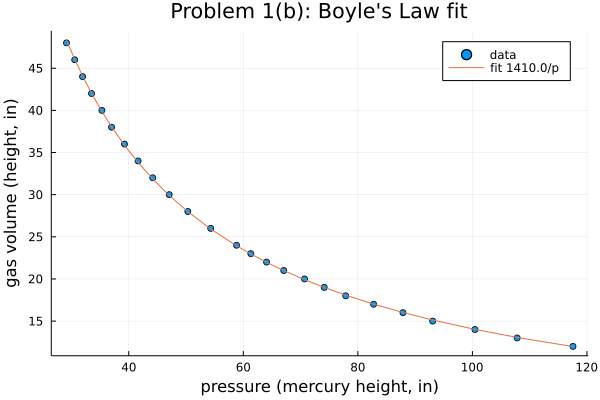

In [3]:
# part (b) plot

using Plots   # you might have to install it first: import Pkg; Pkg.add("Plots")

plot(p, v, seriestype = :scatter, label="data", title = "Problem 1(b): Boyle's Law fit", fmt=:png)
plot!(p, α ./ p, label="fit $(round(α,sigdigits=3))/p")
xlabel!("pressure (mercury height, in)")
ylabel!("gas volume (height, in)")

**(c)** For the model $v = \frac{\alpha}{p} + v_0$, we can rewrite it as
$$ \begin{pmatrix} 1 & 1/p_1 \\ 1 & 1/p_2 \\ \vdots & \vdots \\ 1 & 1/p_k\end{pmatrix} \begin{pmatrix} v_0 \\ \alpha \end{pmatrix}= \begin{pmatrix} v_1 \\ v_2 \\ \vdots \\ v_k\end{pmatrix}$$
Again, we can solve for the least-square solution using `A \ b`:

In [4]:
x = [ones(25) 1 ./ p] \ v # least-square fit

2-element Vector{Float64}:
    0.03915184309358892
 1406.0919291526475

We obtain $\boxed{\alpha = 1406.0919, \ v_0 = 0.0392}$.

**(d)** No, we would not expect to get $v_0 = 0$ exactly, because all practical experimental data includes errors (hopefully small!) that lead to errors in the fit coefficients.

More explicitly, from $x = A \backslash v$, it’s quite clear that errors in $v$ (or $A$) will generally cause errors in $x$, and in fact for an error $\delta v$ in $v$ there is a corresponding error $\delta x = A \backslash dv$ in the fit coefficients x, so that if $\delta v$  becomes smaller then $\delta x$ becomes smaller at the same rate.  Looking at the plot in part (b), we can see by eye that the errors $\delta v$ are rather small (the $\alpha / p$ fit almost goes through the data points), so it is not surprising that in part (c) we get a $v_0$ that is quite small ($\approx$ 300x smaller than the measured $v$ values), and which by inspection seems smaller than the experimental errors.
    
In a statistics class, we would then take the next step of computing the average magnitude of the error $\delta x$ (e.g. the “covariance”, the average $\delta x \delta x^T$) from the average size of the errors $\delta v$ in the inputs (the average $\delta v \delta v^T$).  We could even rigorously compute the probability that $v_0 = 0$ is consistent with this data.  But that goes beyond the scope of 18.06.
    

**(e)** For the model $v = \alpha p^n$, we can take log on both sides to get
$$\boxed{\log v = \log (\alpha p^n) = \log \alpha + \log (p^n) = \log \alpha + n \log p}$$

This shows that $\log v$ depends linearly on two unknown fit parameters $\boxed{\log \alpha, \ n}$.

We can rewrite the above equation as
$$ \begin{pmatrix} 1 & \log p_1 \\ 1 & \log  p_2 \\ \vdots & \vdots \\ 1 & \log p_k\end{pmatrix} \begin{pmatrix} \log \alpha \\ n \end{pmatrix}= \begin{pmatrix} \log v_1 \\ \log v_2 \\ \vdots \\ \log v_k\end{pmatrix}$$
Again, we can solve for the least-square solution using `A \ b`:

In [5]:
x = [ones(25) log.(p)] \ log.(v)

2-element Vector{Float64}:
  7.255502686548169
 -1.0013839808494183

We obtain $\log \alpha = 7.2555$ and $n = -1.0014$. Therefore, we have $\boxed{\alpha = 1415.8746, \ n = -1.0014}$.

Similar to part (d), we can see that $n$ is not exactly $-1$ due to experimental errors.

## Problem 2 (5+5 points)

Let $q$ be some unit vector (i.e. $\Vert q \Vert = 1$).  Define the "reflector" matrix:
$$
F = I - 2qq^T
$$

**(a)** Show that $F$ is unitary.

**(b)** Why is this a "reflector"?   Suppose that we are in 2 dimensions (i.e. $q \in \mathbb{R}^2$).  Draw a picture showing $q$ pointing in some arbitrary direction, and sketch $x$ and $Fx$  for three cases: when $x$ is parallel to $q$, perpendicular to $q$ (and nonzero), or in some other direction (neither parallel nor perpendicular to $q$).

### Solution



**(a)** Note that
$$F^T = (I - 2qq^T)^T = I^T - 2(qq^T)^T = I - 2(q^T)^T q^T = I - 2qq^T = F$$

Therefore,
$$F^T F = (I - 2qq^T) (I-2qq^T) = I - I(2qq^T) - (2qq^T)I + (2 qq^T)(2 qq^T) = I - 4qq^T + 4qq^T qq^T$$

Now, since $q$ is a unit vector, we have $q^T q = \|q\|^2 = 1$. So
$$F^T F = I - 4qq^T + 4q(q^T q)q^T =  I - 4qq^T + 4qq^T = I$$

Therefore, $F$ is unitary.

**(b)** $F$ is a "reflector" because it reflects any point across the hyperplane orthogonal to $q$. 

To see this, recall that 
$\frac{qq^T}{q^Tq}  = qq^T$ is the projection matrix onto the line spanned by the unit vector $q$, and so $P = (I - qq^T)$ is the projection matrix onto the orthogonal complement of the line, i.e. the hyperplane orthogonal to $q$. 

In other words, for any point $x$, we have $x = Px +e$ where $e = x - Px$ is a vector at the point $Px$ pointing towards the point $x$. Now, we consider $Px-e$, which can be viewed geometrically as the reflection of $x$ across the hyperplane. We have
$$Px - e = Px - (x-Px) = 2Px -x = 2(I - qq^T)x - x = (I - 2qq^T)x = Fx$$
This shows that $F$ is a "reflector" that reflects any point across the hyperplane orthogonal to $q$. In fact, it is called a 
[Householder reflector](https://en.wikipedia.org/wiki/Householder_transformation).

An example is as follows:

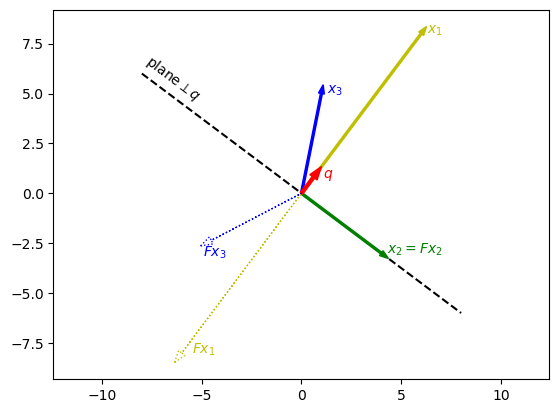

(-8.8, 8.8, -9.322000000000003, 9.202)

In [15]:
using LaTeXStrings
import PyPlot as plt

q = [3/5, 4/5] # an arbitrary unit vector
F = [1 0; 0 1] - 2*q*q' # the reflector matrix

x1 = [6, 8] # parallel to q
x2 = [4, -3] # perpendicular to q
x3 = [1, 5] # some other direction

Fx1 = F*x1
Fx2 = F*x2
Fx3 = F*x3


# the hyperplane orthogonal to q
plt.plot([-2*x2[1],2*x2[1]], [-2*x2[2],2*x2[2]],"k--",zorder=-10)
plt.text(-2*x2[1], -2*x2[2]-1.3, L"\mathrm{plane} \perp q", rotation=rad2deg(atan(x2[2], x2[1])))

# the original points
plt.arrow(0, 0, x1[1], x1[2], width=0.1, color="y")
plt.text(x1[1]+0.3, x1[2], L"x_1", color="y")
plt.arrow(0, 0, x2[1], x2[2], width=0.1, color="g")
plt.text(x2[1]+0.3, x2[2], L"x_2 = Fx_2", color="g")
plt.arrow(0, 0, x3[1], x3[2], width=0.1, color="b")
plt.text(x3[1]+0.3, x3[2], L"x_3", color="b")

# q
plt.arrow(0, 0, q[1], q[2], width = 0.15, color ="r")
plt.text(q[1]+0.5, q[2], L"q", color="r")

# the resulting points
plt.arrow(0, 0, Fx1[1], Fx1[2], color="y", head_width=0.4, linestyle=":", fill=false)
plt.text(Fx1[1]+0.5, Fx1[2], L"Fx_1", color="y")
plt.arrow(0, 0, Fx3[1], Fx3[2], color="b", head_width=0.4, linestyle=":", fill=false)
plt.text(Fx3[1]-0.4, Fx3[2]-0.8, L"Fx_3", color="b")

plt.axis("equal")

## Problem 3 (6+4 points)

From Strang, section 4.3, problem 27 (distance between lines):

The points $p(\alpha) = \begin{pmatrix} \alpha \\ \alpha \\ \alpha \end{pmatrix}$ and $q(\beta) = \begin{pmatrix}\beta \\ 3\beta \\ -1 \end{pmatrix}$, as a function of the scalars $\alpha,\beta$, form two lines in space that never meet.

**(a)** Choose $\alpha$ and $\beta$ to minimize the squared distance $\Vert p - q\Vert^2$.

  - Express this problem in matrix form as minimizing $$\Vert Ax - b\Vert^2$$ for some vector $x$, some matrix $A$, and some vector $b$.
  - Solve the normal equations $A^T A \hat{x} = A^T \vec{b}$ to find the minimizer $\hat{x}$.

**(b)** The line connecting the closest points $p(\hat{\alpha})$ and $q(\hat{\beta})$ is perpendicular to \_\_\_\_\_\_\_\_\_\_\_\_\_\_\_\_.


### Solution



**(a)** We have $p(\alpha) = \alpha \begin{pmatrix}1 \\ 1 \\1 \end{pmatrix}$ and $q(\beta) = \beta\begin{pmatrix}1\\ 3\\ 0\end{pmatrix} + \begin{pmatrix}0\\ 0\\ -1\end{pmatrix}$, so the vector difference is  $$p(\alpha) - q(\beta) = \alpha\begin{pmatrix} 1 \\ 1 \\ 1 \end{pmatrix} - \beta\begin{pmatrix} 1 \\ 3 \\ 0 \end{pmatrix} + \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 & -1 \\ 1 & -3 \\ 1 & 0 \end{pmatrix}\begin{pmatrix} \alpha \\ \beta\end{pmatrix} + \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix} = Ax - b$$ where $$A = \begin{pmatrix} 1 & -1 \\ 1 & -3 \\ 1 & 0 \end{pmatrix}, \ \  b = \begin{pmatrix} 0 \\ 0 \\ -1 \end{pmatrix}.$$  So, finding $\alpha, \beta$ minimizing the length of the vector $p(\alpha) - q(\beta)$ is the same as solving this least squares problem of minimizing $\Vert Ax - b\Vert^2$ over $x=\begin{pmatrix}\alpha\\ \beta\end{pmatrix}$.  The normal equations are $A^TA\hat{x} = A^Tb$. Plugging in $A$ and $b$ as above, this is the matrix equation $$\begin{pmatrix} 3 & -4 \\ -4 & 10\end{pmatrix}\begin{pmatrix}\hat{\alpha}\\ \hat{\beta}\end{pmatrix} = \begin{pmatrix} -1 \\ 0\end{pmatrix}$$ which has solution $$\boxed{\hat{x} = \begin{pmatrix}\hat{\alpha}\\ \hat{\beta}\end{pmatrix} = \begin{pmatrix}-\frac{5}{7}\\ -\frac{2}{7}\end{pmatrix}}.$$

**(b)** The line connecting the closest points $p(\hat{\alpha})$ and $q(\hat{\beta})$ is perpendicular to **the column space** $C(A)$, which means that it is perpendicular to **both lines**.

To see this, note that $Ax - b$ is exactly $p - q$, and from class we showed that the least-square solution occurs when $A\hat{x}$ is the orthogonal projection of $b$ onto $C(A)$, or equivalently $A\hat{x} - b$ is orthogonal to $C(A)$.   That means, here, that the line connecting $p(\hat{\alpha})$ to $q(\hat{\beta})$ (parallel to $p(\hat{\alpha}) - q(\hat{\beta})$) is orthogonal to $C(A)$, i.e. it is orthogonal to $\begin{pmatrix} 1  \\ 1  \\ 1 \end{pmatrix}$ and $\begin{pmatrix} -1 \\  -3 \\ 0 \end{pmatrix}$.

Let's double-check the answer in Julia:

In [7]:
[ 1 -1; 1 -3; 1 0 ] \ [0,0,-1]

2-element Vector{Float64}:
 -0.7142857142857146
 -0.2857142857142858

Yup, this matches our answer from above:

In [8]:
[-5/7, -2/7]

2-element Vector{Float64}:
 -0.7142857142857143
 -0.2857142857142857

## Problem 4 (6+4 points)

(From Strang, section 4.4, problem 18.)

**(a)** Find orthonormal vectors $q_1, q_2, q_3$ by Gram-Schmidt from $a_1, a_2, a_3$ given by:
$$
a_1 = \begin{pmatrix} 1 \\ -1 \\ 0 \\ 0 \end{pmatrix}, \;
a_2 = \begin{pmatrix} 0 \\ 1 \\ -1 \\ 0  \end{pmatrix}, \;
a_3 = \begin{pmatrix} 0 \\ 0 \\ 1 \\ -1  \end{pmatrix},
$$
which are a basis for the vectors perpendicular to $d = \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}$, i.e. a basis for the nullspace of \_\_\_\_\_\_\_\_\_\_\_\_\_\_.   

**(b)** If you form the $4\times 3$ matrix $Q = \begin{pmatrix} q_1 & q_2 & q_3 \end{pmatrix}$, then what is $Q^T d$?  (No arithmetic is required — think about it!)

### Solution

**(a)** To simplify our calculation, we will first find an orthogonal basis $\{v_1, v_2, v_3\}$ using Gram-Schmidt without the normalizing.

For the first vector, we can simply take $v_1 = a_1 = \begin{pmatrix}1 \\ -1 \\ 0 \\ 0\end{pmatrix}$.

To find $v_2$, we need to subtract the projection of $a_2$ onto $a_1$.  So, $$v_2 = a_2 - v_1\frac{v_1^T a_2}{v_1^Tv_1} = \begin{pmatrix}1/2 \\ 1/2 \\ -1 \\ 0\end{pmatrix}.$$  

We need to do the same for $a_3$, and we compute $$v_3 = a_3 - v_1\frac{v_1^Ta_3}{v_1^Tv_1}  - v_2\frac{v_2^Ta_3}{v_2^Tv_2}   =  \begin{pmatrix}1/3 \\  1/3 \\ 1/3 \\ -1\end{pmatrix}.$$  

Once we have found $v_1, v_2, v_3$, we can obtain orthonormal vecotrs $q_1, q_2, q_3$ by normalizing each of them:
$$\boxed{q_1 = \frac{v_1}{\|v_1\|} = \frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1 \\ 0 \\ 0\end{pmatrix}, \ \ q_2 = \frac{v_2}{\|v_2\|} = \frac{1}{\sqrt{6}}\begin{pmatrix}1 \\ 1 \\ -2 \\ 0\end{pmatrix}, \ \ q_3 = \frac{v_3}{\|v_3\|} = \frac{1}{2\sqrt{3}}\begin{pmatrix}1 \\ 1 \\ 1 \\ -3\end{pmatrix}}$$  
By inspection, we can see they are each orthonormal to the rest and also to $d$, i.e. a basis for the nullspace of $\boxed{\begin{pmatrix} 1 & 1 & 1 & 1 \end{pmatrix}}$.   

**(b)** The matrix $Q^Td$ will be the column vector recording the dot products of $q_1, q_2, q_3$ with $d$, and you were told that $d$ is orthogonal to $a_1,a_2,a_3$ and hence it must be orthogonal to $q_1,q_2,q_3$ as well (since they are in span$\{a_1,a_2,a_3\}$)!  So, **without any calculation**, you should be able to see that $\boxed{Q^Td = 0}$.

### (Optional) checks in Julia:

As a check, let's do the calculation in Julia:

In [9]:
q1 = 1/sqrt(2)*[1,-1,0,0]

q2 = 1/sqrt(6)*[1,1,-2,0]

q3 = 1/(2*sqrt(3))*[1,1,1,-3]

Q = [q1 q2 q3]

Q' * [1,1,1,1]

3-element Vector{Float64}:
  0.0
  0.0
 -1.1102230246251565e-16

This is zero (up to roundoff errors), as expected.

We can also check that $Q^T Q = I$ (up to roundoff errors):

In [10]:
Q'Q

3×3 Matrix{Float64}:
  1.0           2.45143e-17  -8.8981e-18
  2.45143e-17   1.0          -1.10972e-17
 -8.8981e-18   -1.10972e-17   1.0

In [11]:
using LinearAlgebra # for I

Q'Q ≈ I

true

We could also use Julia's `qr` function to find the $Q$.

`qr(A)` computes a "QR factorization" object that stores both the $Q$ and the $R$ in the $A = QR$ factorization.  We can extract just the $Q$ factor with $qr(A).Q$, but it turn out that this is the "full" QR factorization where $Q$ is a squaare matrix consisting of an orthnormal basis for $C(A)$ followed by an orthonormal basis for $C(A)^\perp = N(A^T)$.  To get just the "thin" QR factor consisting of the basis for $C(A)$, the [`qr` documentation](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#LinearAlgebra.qr) tells us to do `Matrix(qr(A).Q`:

In [12]:
A = [[1,-1,0,0] [1,1,-2,0] [1,1,1,-3]] # [a1 a2 a3]

4×3 Matrix{Int64}:
  1   1   1
 -1   1   1
  0  -2   1
  0   0  -3

In [13]:
Matrix(qr(A).Q)

4×3 Matrix{Float64}:
 -0.707107  -0.408248  -0.288675
  0.707107  -0.408248  -0.288675
  0.0        0.816497  -0.288675
  0.0        0.0        0.866025

Interestingly, this is **not quite the same** as what we got from Gram–Schmidt by hand calculation:

In [14]:
Q

4×3 Matrix{Float64}:
  0.707107   0.408248   0.288675
 -0.707107   0.408248   0.288675
  0.0       -0.816497   0.288675
  0.0        0.0       -0.866025

The difference is only in the **signs** of the second and third columns, which is **okay**: the QR factorization is only unique up to ± signs for real matrices, since you can always flip the sign of a $q$ without changing orthonormality.

In fact, Julia's `qr` function is using a *totally different* algorithm than Gram–Schmidt, called a "Householder QR" algorithm.